# OpenStreetMap Project - Data Wrangling with SQL

Open Street Map(OSM): creates and distributes free geographic data for the worlds its being built by volunteers largely from scratch and released with an open-content license. It provides access to the map images and all of the underlying map data. The data is stored in XML format and is generated by various users. hence the data is prone to manmade errors

## Overview
Need to choose any area of the world in https://www.openstreetmap.org and use data munging techniques, such as assessing the quality of the data for validity, accuracy, completeness, consistency and uniformity, to clean the OpenStreetMap data. Then import the cleaned .csv files into a SQL database using custom schema.

### Map Area:Chennai, India
* https://mapzen.com/data/metro-extracts/your-extracts/2aec101bf7af

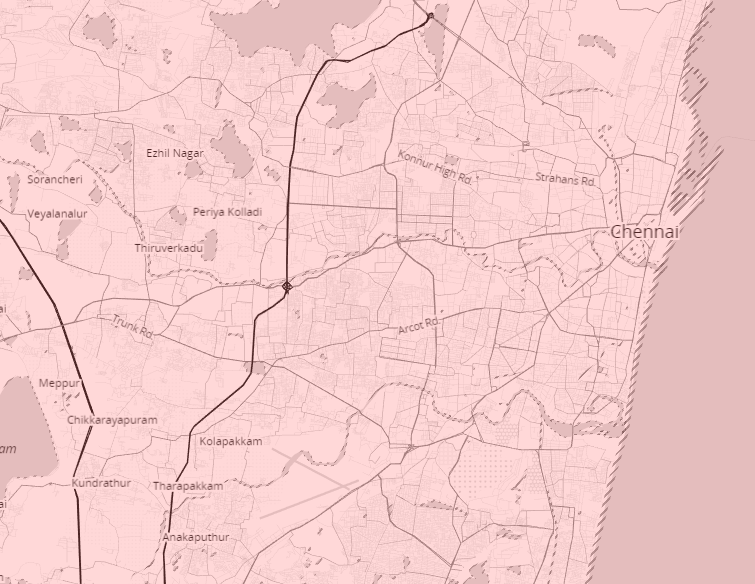

In [1]:
from IPython.display import Image
Image("chennai.png")

### Coding Process

* Preparation of the OSM file.
* Data Exploration, auditing and fixing issues
* Data shaping and validity checking
* Exporting to .csv and further analysis via SQL

Preparation of the OSM file involves in getting the data extract from MapZehttps://mapzen.com/data/metro-extracts/your-extracts/2aec101bf7af). The extract is a huge file. We develop the sample osm file(using sample.py) which is used for speeding up the initial exploration and testing process. Then the code is run against the main.osm file and tested for the entire data extract.


Moving on to the next phase, the initial exploratory phase of the data. Mapparser.py and and exploredata.py were used for exploring the various nodes and their formats. 
The data auditing and fixing were done using the audit.py file. The remaining part of the data shaping, validity checking and exporting were done using the data.py file.

## Exploring the Data

In [2]:
OSMFILE = 'chennai.osm'
import mapparser
import tags

In [3]:

mapparser.count_tags(OSMFILE)

defaultdict(int,
            {'bounds': 1,
             'member': 1809,
             'nd': 1008814,
             'node': 811821,
             'osm': 1,
             'relation': 533,
             'tag': 214432,
             'way': 183880})

The 3264036 tags in the file are name-value pair, to define multiple attributes of nodes or ways.

In [4]:
tags.process_map(OSMFILE)

{'lower': 209460, 'lower_colon': 4503, 'other': 469, 'problemchars': 0}

The above output presents the different type of tags in the .OSM file and their count. Exploring the tags further
Four tag key categories:
* "lower", for tags that contain only lowercase letters and are valid
* "lower_colon", for otherwise valid tags with a colon in their names
* "problemchars", for tags with problematic characters
* "other", for other tags that do not fall into the other three categories

In [5]:
import users
all_users = users.get_all_users(OSMFILE)
len(all_users)

789

In [6]:
# sort the all_users reversely by contribution counts
import operator
sorted_users = sorted(all_users.items(), key=operator.itemgetter(1), reverse=True)
sorted_users[:15]


[('90125', 1),
 ('74061', 1),
 ('45027', 1),
 ('3899066', 1),
 ('4269412', 1),
 ('1575339', 1),
 ('252955', 1),
 ('70696', 1),
 ('2066724', 1),
 ('5397231', 1),
 ('6272152', 1),
 ('1708084', 1),
 ('2949585', 1),
 ('474183', 1),
 ('2543482', 1)]

The leading user has contributed 6613 entries

### Problems encountered in the data extract

* Inconsistent phone numbers
* Inconsistent street mappings
* Inconsistent zip codes

### Fixing Inconsistent zip Codes

A Postal Index Number or PIN or Pincode is a code in the post office numbering or post code system used by India Post, the Indian postal administration. 
* The code is six digits long. 
* The first three digits of the PIN represent a specific geographical region called a sorting district that is headquartered at the main post office of the largest city and is known as the sorting office. A state may have one or more sorting districts depending on the volumes of mail handled.
* The fourth digit represents the route on which a Delivery office is located in the sorting district. This is 0 for offices in the core area of the sorting district.


Here we are working with the postal codes of Chennai, which is in the state of Tamilnadu. The postal code of Chennai starts with 600.

#### Issues encountered and their fixes
* postal code numbers more than 6 digits. This case the postal codes were checked and mapped with the correct codes.
* postal codes with special characters like comma, hyphen,dot etc. This case was handled by using regular expressions and string functions to remove them.
* postal codes of other regions than chennai included. These will be deleted.

In [7]:
import audit
audit.fix_postcodes(OSMFILE)


('Res', 'Anna Salai ')
('6000036', '600036')
('600 006', '600006')
('600 020.', '600020')
('600 028', '600028')
('6000113', '600113')
('6000036', '600036')
('6000036', '600036')
('560076,', '560076')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('600 017', '600017')
('6000036', '600036')
('6000036', '600036')
('6000042', '600042')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')
('6000036', '600036')


### Fixing Inconsistent City names

* The names were inconsistent, they were either misspelled or some were in entire lower case or uppercase. Here a standard format has been implemented.
* Some places were abbreivated, they were all transformed to the correct names. For example T.nagar,t-nagar, t nagar were all mapped to Thygaraya Nagar
* There were two situations where the city name was listed as bangalore and hydrabad, which is a different city. This data will be deleted.

In [8]:
audit.fix_city_names(OSMFILE)

('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai-17', 'Chennai')
('saidapet', 'Saidapet')
('saidapet', 'Saidapet')
('CHENNAI', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('CHENNAI', 'Chennai')
('CHENNAI', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('T.Nagar,Chennai', 'Thygaraya Nagar')
('chennai', 'Chennai')
('chennai', 'Chennai')
('CHENNAI', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai', 'Chennai')
('chennai',

### Fixing Inconsistent Street Names

In this case it was noted that there was inconsistency in the use street types. For example st or St or st was used instead of Street. Similarly it was observed in the case of Road, Lane etc. Consistency in data sets is highly desirable since the query results will not be appropriate. This issue was corrected with proper mappings

In [9]:
audit.fix_streets(OSMFILE)

('2nd Ave', '2nd Avenue')
('Sivagnanam St.', 'Sivagnanam Street')
('Rengabashyam St', 'Rengabashyam Street')
('Rengabashyam St', 'Rengabashyam Street')
('14th Ave', '14th Avenue')
('Chakrapani St', 'Chakrapani Street')
('Shastri Nagar 1st Cross St', 'Shastri Nagar 1st Cross Street')
('Akbarabad 1st St', 'Akbarabad 1st Street')
('14th Ave', '14th Avenue')
('Rengabashyam St', 'Rengabashyam Street')
('53rd St', '53rd Street')
('7th Ave', '7th Avenue')
('7th Ave', '7th Avenue')
('54th St', '54th Street')
('Indira Nagar 1st Ave', 'Indira Nagar 1st Avenue')
('Alumni Ave', 'Alumni Avenue')
('Hostel Ave', 'Hostel Avenue')
('S Mada St', 'S Mada Street')
('Jayaram St', 'Jayaram Street')
('Jayaram St', 'Jayaram Street')
('16th Cross St', '16th Cross Street')
('16th Cross St', '16th Cross Street')
('brindavan St', 'brindavan Street')
('2nd St', '2nd Street')
('Abusali St', 'Abusali Street')
('5th St', '5th Street')
('Venu Reddy St', 'Venu Reddy Street')
('Deena Dyalu St.', 'Deena Dyalu Street')
('

## Preparing the data and exporting it to the database

After the audting and fixing the issues, the elements of the OSM file were parsed the data was exported to .csv files using the data.py file. The result were following files created.
* nodes.csv(holds the top level nodes: **id ,lat ,lon ,user, uid, version, changeset, timestamp**)
* nodes_tags.csv(holds secondary tag attributes of the node: **id, key, value, type**) 
* ways.csv(holds the top level way attributes: **id, user, uid, version, changeset, timestamp**)
* ways_nodes.csv(holds secondary tag attributes of way: **id, key, value, type**)
* ways_tags.csv(holds nd child tag attributes of way: **id, node_id, position**)


Importing these csv files into chennai database(chennai.db). This was done using csvtodb.py. The schema followed is schema.py

### Data Overview

In [17]:
import sqlite3
import pandas as pd

sqlite_file = 'chennai.db'    # name of the sqlite database file

# Connecting to the database file
conn = sqlite3.connect(sqlite_file)
cur = conn.cursor()


### Number of Nodes

In [18]:
query ='''
SELECT COUNT(*) FROM nodes;
'''
cur.execute(query)
result = cur.fetchall()
print(result)

[(811821,)]


### Number of Ways

In [19]:
query ='''
SELECT COUNT(*) FROM ways;
'''
cur.execute(query)
result = cur.fetchall()
print(result)

[(183880,)]


### Number of Unique Users

In [20]:
query = '''
SELECT COUNT(DISTINCT(u.uid))          
FROM 
    (SELECT uid FROM nodes 
    UNION ALL 
    SELECT uid FROM ways) u;
'''
cur.execute(query)
result = cur.fetchall()
print(result)

[(783,)]


### Top 10 Contributing users

In [21]:
df = pd.read_sql_query('''SELECT sq.user, COUNT(*) as num
FROM (SELECT user FROM nodes UNION ALL SELECT user FROM ways) as sq
GROUP BY sq.user
ORDER BY num DESC LIMIT 10;''', conn)
df

,user,num
0,maheshrkm,78684
1,PlaneMad,60152
2,praveeng,55108
3,venkatkotha,43054
4,anthony1,40969
5,Rahuldhanraj,39965
6,shalinins,36856
7,harishk,36723
8,jasvinderkaur,36081
9,vamshikrishna,35910


### Amneties by count

In [22]:
df = pd.read_sql_query('''SELECT value, COUNT(*) AS num
FROM nodes_tags
WHERE nodes_tags.key = 'amenity'
GROUP BY value
ORDER BY num DESC limit 15;''', conn)
df

,value,num
0,restaurant,239
1,place_of_worship,155
2,atm,117
3,bank,102
4,hospital,83
5,library,68
6,pharmacy,66
7,school,66
8,fuel,63
9,toilets,50


### Religions of interest in Chennai

In [23]:
df = pd.read_sql_query('''SELECT nodes_tags.value, COUNT(*) AS num
FROM nodes_tags 
    INNER JOIN 
        (SELECT DISTINCT(id) 
        FROM nodes_tags 
        WHERE value='place_of_worship') place
    ON nodes_tags.id=place.id
WHERE nodes_tags.key='religion'
GROUP BY nodes_tags.value
ORDER BY num DESC;''',conn)
df

,value,num
0,hindu,75
1,christian,26
2,muslim,7


### Inconsistent Restaurant names

There are two restaurents, whose names have been inconsistent.

1. Adayar Ananda Bhavan spelt as Adyar Anand bhavan and Adyar Ananda bhavan
2. Hotel Saravana Bhavan as Saravana Bhavan
3. Anjappar as Anajappar

In [33]:
df = pd.read_sql_query('''SELECT a.value, COUNT(*) as num, a.id
FROM (SELECT * FROM nodes_tags UNION ALL SELECT * FROM ways_tags) as a
      JOIN
     (SELECT DISTINCT(id) FROM nodes_tags WHERE nodes_tags.value='restaurant'
      AND nodes_tags.id NOT IN
                       (SELECT ways_nodes.node_id FROM ways_nodes
                        JOIN
                       (SELECT DISTINCT(id) FROM ways_tags WHERE ways_tags.value='restaurant') as b
                       ON ways_nodes.id = b.id)
      UNION ALL
      SELECT DISTINCT(id) FROM ways_tags WHERE ways_tags.value='restaurant') as c
      ON a.id=c.id
WHERE a.key='name'
GROUP BY a.value
ORDER BY num DESC
LIMIT 30;  ''',conn)
df

,value,num,id
0,Hotel Saravana Bhavan,17,217753805
1,Adayar Ananda Bhavan,13,4799194310
2,Bombay Halwa House,3,384700520
3,Hot Chips,3,1993266479
4,KFC,3,354813862
5,Sri Krishna Sweets,3,441568062
6,Subway,3,354746190
7,Anjappar,2,3687729139
8,Asli Punjabi Rasoi Ghar,2,1685079568
9,Cream & Fudge,2,2394720835


In [25]:
query ='''
UPDATE nodes_tags
SET value='Hotel Saravana Bhavan'
WHERE value='Saravana Bhavan'  
and key='name' ;

'''
cur.execute(query)

In [27]:
query ='''
UPDATE nodes_tags
SET value='Adayar Ananda Bhavan'
WHERE value='Adyar Ananda Bhavan'  
and key='name' ;

'''
cur.execute(query)

In [29]:
query ='''
UPDATE nodes_tags
SET value='Adayar Ananda Bhavan'
WHERE value='Adyar Anand Bhavan'  
and key='name' ;

'''
cur.execute(query)

In [32]:
query ='''
UPDATE nodes_tags
SET value='Anjappar'
WHERE value='Anajappar'  
and key='name' ;

'''
cur.execute(query)

In [35]:
df[df.value.str.contains('Anja')]

,value,num,id
7,Anjappar,2,3687729139


### Conclusion

The openstreet map data of Chennai, India is of reasonable quality, there are many data entry errors. Significant amount of data has been cleaned for the purpose of this project. There is a lots of room for improvement for this project. Several options can be created for cleaning and validating the data.

1. Build parser that parses every word input by the user to avoid the human input errors
2. Can build a script that cleans the data periodically
3. The mappings are not very consistent. This leads to less info about the details.Some places eatouts have been given different names as fast_food, restaurents etc which can be of the same group and add more params to differentiate if they are of varoius kinds.